In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
edges=pd.read_csv('edges.csv')
nodes=pd.read_csv('nodes.csv')
heroes_app=pd.read_csv('hero-network.csv')

# display the data

In [3]:
edges.head(5)

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251


In [4]:
heroes_app.head(5)

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


In [5]:
nodes.head(5)

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero


(array([12651.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  6439.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

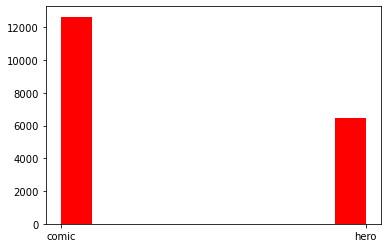

In [6]:
plt.hist(nodes['type'],color='r')

# The heroes that appeared with the three following heroes :

In [7]:
Thor = heroes_app[heroes_app['hero1']=='THOR/DR. DONALD BLAK'].sample(100)
Cap = Subset = heroes_app[heroes_app['hero1']=='CAPTAIN AMERICA'].sample(100)
IronMan = heroes_app[heroes_app['hero1'].str.contains('IRON MAN/TONY STARK')].sample(100)
Subset = pd.concat([Thor,Cap,IronMan],axis = 0)
Subset

,hero1,hero2
151363,THOR/DR. DONALD BLAK,KARNILLA [ASGARDIAN]
380539,THOR/DR. DONALD BLAK,"KINCAID, DR. JANE FO"
77500,THOR/DR. DONALD BLAK,DR. DRUID/ANTHONY LU
240102,THOR/DR. DONALD BLAK,LOCKHEED
22157,THOR/DR. DONALD BLAK,MAGDALENE/MARISSA DA
...,...,...
508301,IRON MAN/TONY STARK,IRON MAN III/EDDIE M
203917,IRON MAN/TONY STARK,INAZUMA
385471,IRON MAN/TONY STARK,FIXER II/PAUL NORBER
50264,IRON MAN/TONY STARK,ODIN [ASGARDIAN]


# The network connection between the heroes :

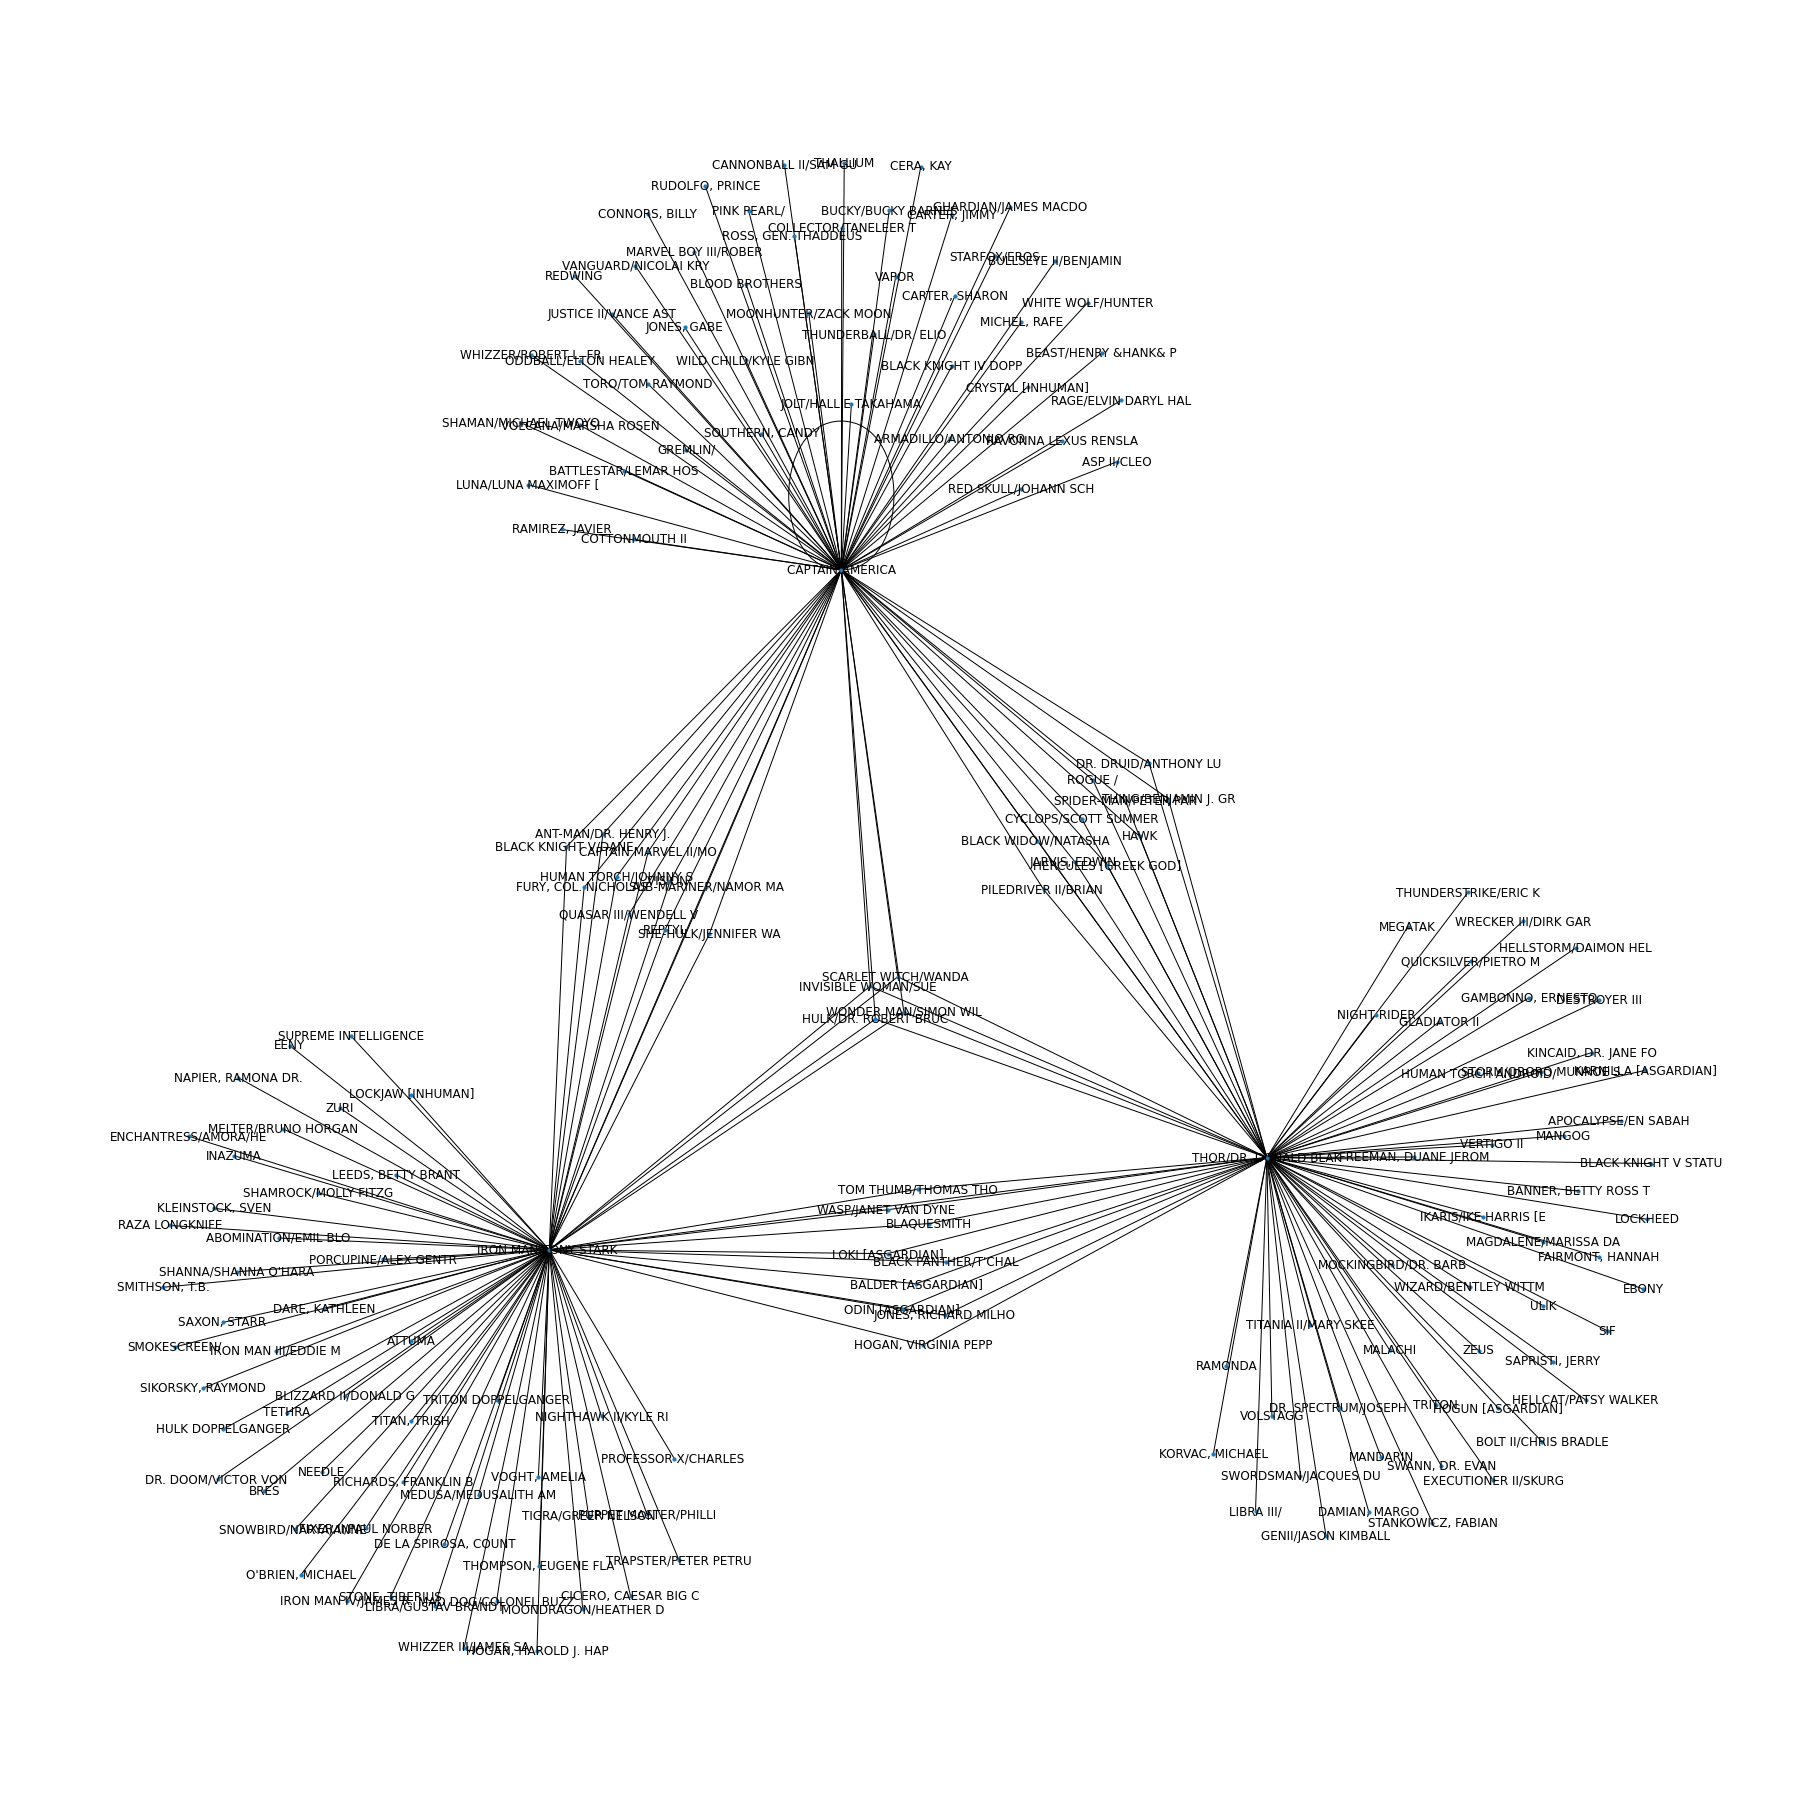

In [8]:
G=nx.from_pandas_edgelist(Subset, 'hero1', 'hero2')
plt.figure(figsize = (25,25))
nx.draw(G, with_labels=True, node_size = 10)
plt.show()

# The centarlity of the Universe

In [9]:
pre_centrality=nx.degree_centrality(G)

In [10]:
centrality=pd.DataFrame(pre_centrality.items(),columns=['Actor','Centrality'])
centrality=centrality.sort_values(by=['Centrality'],ascending=False)
centrality

,Actor,Centrality
58,IRON MAN/TONY STARK,0.422222
60,CAPTAIN AMERICA,0.411111
0,THOR/DR. DONALD BLAK,0.405556
65,HULK/DR. ROBERT BRUC,0.016667
36,INVISIBLE WOMAN/SUE,0.016667
...,...,...
75,VOLCANA/MARSHA ROSEN,0.005556
76,JUSTICE II/VANCE AST,0.005556
77,LUNA/LUNA MAXIMOFF [,0.005556
78,WHIZZER/ROBERT L. FR,0.005556


Text(0, 0.5, 'Centarlity')

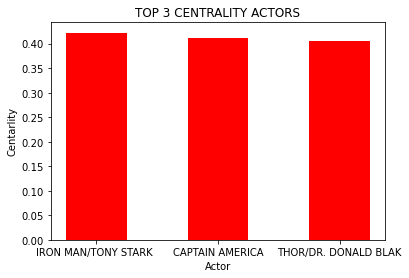

In [11]:
cen_vis=centrality.head(3)
plt.bar(x=cen_vis['Actor'],height=cen_vis['Centrality'],width=0.5,color='red')
plt.title('TOP 3 CENTRALITY ACTORS')
plt.xlabel('Actor')
plt.ylabel('Centarlity')

In [12]:
no_nodes=nx.number_of_nodes(G)
no_edges=nx.number_of_edges(G)
isolation=nx.number_of_isolates(G)
avg_con=nx.average_node_connectivity(G)
assor_degree=nx.degree_assortativity_coefficient(G,x='in',y='out')

In [13]:
print('number of nodes :',no_nodes)
print('number of edges :',no_edges)
print('assortativity degree : ',assor_degree)
print('average connectivity : ',avg_con)
print('isolation :',isolation)

number of nodes : 181
number of edges : 219
assortativity degree :  -0.9679026777232009
average connectivity :  1.0422958870472683
isolation : 0


In [15]:
eigen_cen=nx.eigenvector_centrality(G)
actors=eigen_cen.keys()
eigen_cen_values=eigen_cen.values()
#atz_cen=nx.katz_centrality(G)
#katz_cen=katz_cen.values()
closs_cen=nx.closeness_centrality(G)
closs_cen=closs_cen.values()
bet_cen=nx.betweenness_centrality(G)
bet_cen=bet_cen.values()
cluster=nx.clustering(G)
cluster=cluster.values()
average_n=nx.average_neighbor_degree(G)
average_n=average_n.values()

In [16]:
stats=pd.DataFrame(actors,columns=['Actors'])
stats['Eigenvector']=eigen_cen_values
#stats['Katz']=katz_cen
stats['Closseness']=closs_cen
stats['Betweenness']=bet_cen
stats['Cluster']=cluster
stats['Avergae neighbors']=average_n
stats.sort_values(by='Eigenvector',ascending=False)

,Actors,Eigenvector,Closseness,Betweenness,Cluster,Avergae neighbors
60,CAPTAIN AMERICA,0.469183,0.625000,0.489820,0.011346,4.337838
58,IRON MAN/TONY STARK,0.419836,0.633803,0.526443,0.009825,3.263158
0,THOR/DR. DONALD BLAK,0.403820,0.627178,0.503166,0.010654,3.397260
65,HULK/DR. ROBERT BRUC,0.115434,0.504202,0.000000,1.000000,74.333333
36,INVISIBLE WOMAN/SUE,0.115434,0.504202,0.000000,1.000000,74.333333
...,...,...,...,...,...,...
27,NIGHT RIDER,0.036056,0.386266,0.000000,0.000000,73.000000
28,THUNDERSTRIKE/ERIC K,0.036056,0.386266,0.000000,0.000000,73.000000
32,HELLCAT/PATSY WALKER,0.036056,0.386266,0.000000,0.000000,73.000000
35,APOCALYPSE/EN SABAH,0.036056,0.386266,0.000000,0.000000,73.000000
